### 인구데이터를 활용한 데이터 분석
1. 데이터를 읽어온다
2. 궁금한 지역의 이름을 입력받는다
3. 궁금한 지역의 인구 구조를 저장한다
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화한다

In [1]:
# 1. 데이터를 읽어온다
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)

# 2. 궁금한 지역의 이름을 입력받는다
name = input('궁금한 지역의 이름을 입력하세요 : ')

# 3. 궁금한 지역의 인구 구조를 저장한다
result = []
for row in data:
    if name in row[0]:
        for i in row[3:]:
            result.append(int(i))
print(result)

궁금한 지역의 이름을 입력하세요 : 신도림
[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


### Numpy 사용 코드

궁금한 지역의 이름을 입력하세요 : 신도림


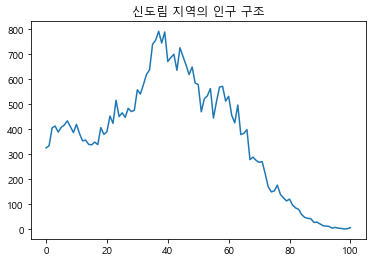

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 1. 데이터를 읽어온다
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)

# 2. 궁금한 지역의 이름을 입력받는다
name = input('궁금한 지역의 이름을 입력하세요 : ')

# 3. 궁금한 지역의 인구 구조를 저장한다
result = []
for row in data:
    if name in row[0]:
        result = np.array(row[3:], dtype=int)      

plt.rc('font', family='Malgun Gothic')
plt.title(f'{name} 지역의 인구 구조')
plt.plot(result)
plt.show()

### 가장 비슷한 인구 구조를 가진 지역 구하는 알고리즘
- 전국의 모든 지역 중 한 곳을 선택 : B
- 궁금한 지역 A의 0세 인구 비율에서 B 지역 0세 인구 비율을 뺀다
- 100세까지의 모든 차이를 더한다
- 전국의 모든 지역에서 차이가 적은 곳을 고른다

In [13]:
data = list(data)

# 3. 궁금한 지역의 인구 구조를 저장한다
for row in data:
    if name in row[0]:
        result = np.array(row[3:], dtype=int) / int(row[2])  

# 4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다
mn = 1
result_name = ''
result_data = 0
for row in data:
    away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum((result - away)**2)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result_data = away

### 최종 코드

궁금한 지역의 이름을 입력하세요 : 중계1동


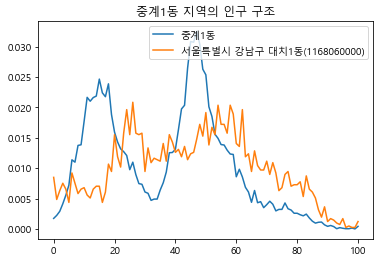

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# 1. 데이터를 읽어온다
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)

# 2. 궁금한 지역의 이름을 입력받는다
name = input('궁금한 지역의 이름을 입력하세요 : ')

# 3. 궁금한 지역의 인구 구조를 저장한다
for row in data:
    if name in row[0]:
        result = np.array(row[3:], dtype=int) / int(row[2])  

# 4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다
mn = 1
result_name = ''
result_data = 0
for row in data:
    away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum((result - away)**2)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result_data = away

# 5. 시각화
plt.rc('font', family='Malgun Gothic')
plt.title(f'{name} 지역의 인구 구조')
plt.plot(result, label=name)
plt.plot(away, label=result_name)
plt.legend()
plt.show()